# Gender Variation Effects on Accuracy of Classifiers Predicting Presence of Heart Disease


### Introduction

**background information**

Heart disease, as a common type of cardiovascular disease, is commonly discussed in the medical field and has harmful effects to human health, always leading to death.  Heart disease consists of various heart conditions. The most popular type is coronary artery disease, which influences flow of blood to the heart, possibly causing heart attack as a result of decreased blood flow (Heart Disease Resources | cdc.gov, 2022). Among a large number of factors correlated to heart disease, a previous study concluded that levels of depression are highly associated with cardiovascular health related to coronary heart disease (Shen et al., 2022). Another possible related factor to heart disease is age, as the correlation between age and heart disease is a popular topic people discuss in daily life. Research done by Kumari et al. (2015) inferred from a randomly selected sample in a medical college that, prevalence of coronary heart disease is the highest in the middle age group, aged from 50 - 59 years-old. This research report suggests the existence of a  strong correlation between age and the presence of heart disease. Furthermore, effects of gender variation on heart disease is considered as a significant scientific understanding in medical progress (DI FUSCO et al., 2014). In a nutshell, association of age and depression with presence of heart disease is predicted to vary according to gender difference.

In this report, different classification models to predict the presence of heart disease will be built, based on two variables: age and depression, separately for each gender. The accuracy of classifiers is predicted to be improved according to gender variation, compared to the classifier without grouping by gender. 


**question tried to answer in this project**

Based on academic research done on the topic of associations of variables with the presence of heart disease, the research question will be discussed in this report is how does different gender affect the accuracy of classifiers predicting presence of heart disease?


**identify and describe dataset**

The dataset is collected from UCI Machine Learning Repository, which originally has 14 variables including 13 numerical variables such as age, sex and blood pressure, and one character type variable	that is the presence of heart disease. Each row represents detailed information of one patient. The focus point of this dataset is the presence of heart disease (UCI Machine Learning Repository: Heart Disease Data Set, n.d.).

# Methods & Results

In [2]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(tidymodels)
library(digest)
library(repr)
library(ggplot2)
library(cowplot)
options(repr.matrix.max.rows = 6)

options(warn=-1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

### Step 1: loads data from the original source on the web

In [3]:
# the original dataset is downloaded from web and uploaded to Github first, the url is copied from Github to load the heart
# disease data set

urlfile <-"https://raw.githubusercontent.com/ShahrukhP15/DSCI100_GroupProject_113/main/Heart_Disease_Prediction.csv"
original_heart_data <- read_csv(urlfile)

head(original_heart_data)


Rows: 270 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Heart Disease
dbl (13): Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG resu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence


### Step 2: wrangles and cleans the data

In [4]:
# select the necessary variables for the planned analysis, Age, BP, Cholestrerol and ST depression are selected as the plan is
# using numerical variables to predict categorical variable (planning to use classification method), and these four variables 
# are the only continuously numerical variables, the rest variables are considered to be categorical variables.
# Also, the categorical variable sex is needed for creating separate models for each gender, and the categorical variable of 
# presence of heart disease is needed to be the predicting type. Both sex and heart disease variables are converted to factors
# as they are considered as categorical variables in the planned analysis, but their origincal forms do not allow categorical
# analysis on them.
heart_data <- original_heart_data |> 
             select(Age,Sex,BP,Cholesterol,`ST depression`,`Heart Disease`) |>
             mutate(`Heart Disease` = as_factor(`Heart Disease`), Sex= as_factor(Sex))
head(heart_data)

Age,Sex,BP,Cholesterol,ST depression,Heart Disease
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
70,1,130,322,2.4,Presence
67,0,115,564,1.6,Absence
57,1,124,261,0.3,Presence
64,1,128,263,0.2,Absence
74,0,120,269,0.2,Absence
65,1,120,177,0.4,Absence


### Step 3: Explore dataset

In [5]:
# Setting seed for the randomly splitting dataset step to make sure the results is reproducible. 
# split the cleaned data 25/75 into a training set and test set, the training set is for building classifier, and the test set
# is for evaluating the accuracy of the classifier for prediction, stratified in Heart Disease, the predicting categorical
# variable, thus same proportion of absence or presence ends up in both training set and testing sets.
set.seed(2022)
heart_split <- initial_split(heart_data, prop = 3/4, strata = `Heart Disease`)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

# Explore the training heart disease dataset
# Find the average of four numerical variables to have a sense of their centers roughly
# Find the number and percentage of observations of whether heart disease is present in the training dataset
num_obs <- nrow(heart_train)
heart_train |>
  group_by(`Heart Disease`) |>
  summarize(
   count = n(),
   percentage = n() / num_obs * 100,
   avg_age = mean(Age),
   avg_BP = mean(BP),
   avg_cholesterol = mean(Cholesterol),
   avg_ST_depression = mean(`ST depression`))
options(warn=0)

Heart Disease,count,percentage,avg_age,avg_BP,avg_cholesterol,avg_ST_depression
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Presence,90,44.55446,56.01111,134.5778,253.2556,1.6933333
Absence,112,55.44554,52.91071,129.0893,244.0536,0.5473214


### Step 4: creates a visualization of the dataset

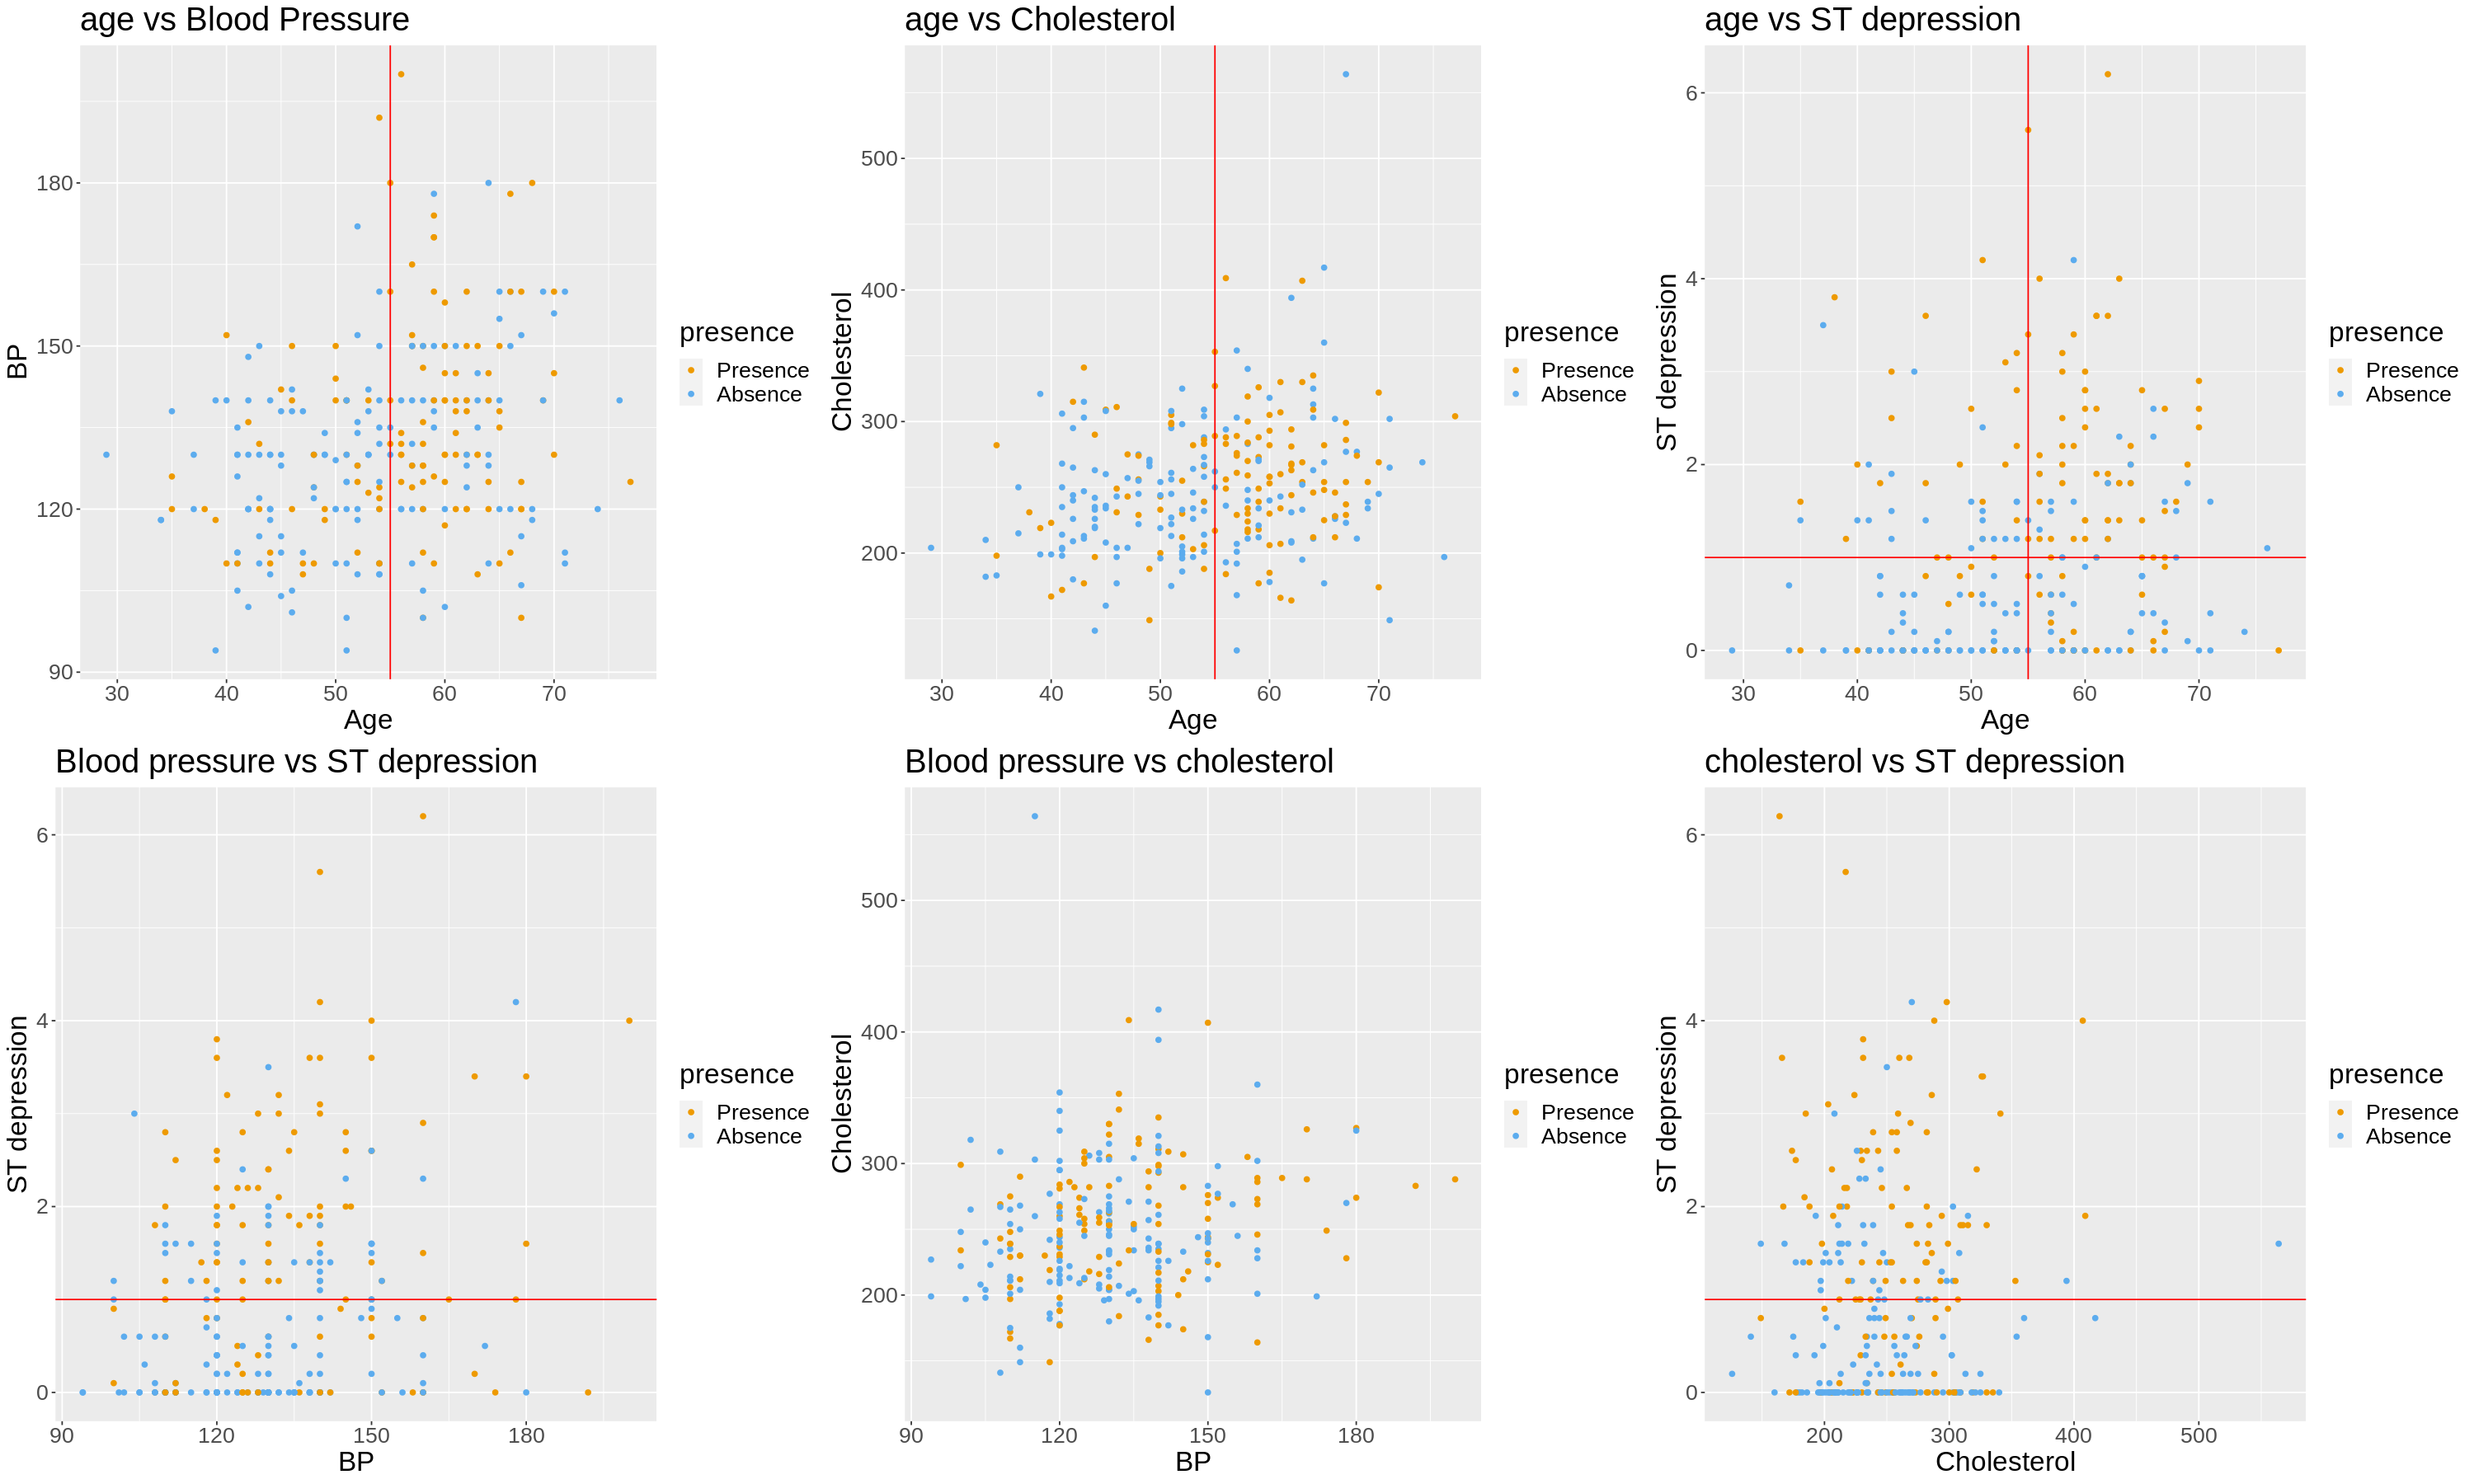

In [41]:
# Creates scatter plots to visualize the relationships between each two of the four variables and also shows
# the categorical presence of heart disease in color in graphs

# 6 scatter plots are created below :(age, blood pressure) (age, cholestrol) (age, ST depression)
# (blood pressure, ST depression) (blood pressure, cholestrol) (cholestrol,ST depression)

# vertical and horizontal red solid lines are used to separate the large proportion of presence of heart disease and the 
# large proportion fo absence of heart disease according to only some of the related variables, which can be visually
# represented by the area with much more orange dots (representing presence of heart disease), and the area with much more
# blue dots (representing absence of heart disease)

age_blood <-heart_data |>
  ggplot(aes(x = Age, y = BP, color = `Heart Disease`)) +
  geom_point(alpha = 1) +
  geom_vline(xintercept=55,linetype="solid",color="red",size=0.5)+
  labs(color = "presence") + ggtitle("age vs Blood Pressure")+
  scale_color_manual(labels = c("Presence", "Absence"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20))

age_c <-heart_data |>
  ggplot(aes(x = Age, y = Cholesterol, color = `Heart Disease`)) +
  geom_point(alpha = 1) +
  geom_vline(xintercept=55,linetype="solid",color="red",size=0.5)+
  labs(color = "presence") + ggtitle("age vs Cholesterol")+
  scale_color_manual(labels = c("Presence", "Absence"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20))

age_ST <-heart_data |>
  ggplot(aes(x = Age, y = `ST depression`, color = `Heart Disease`)) +
  geom_point(alpha = 1) +
  geom_vline(xintercept=55,linetype="solid",color="red",size=0.5)+
  geom_hline(yintercept=1,linetype="solid",color="red",size=0.5)+
  labs(color = "presence") +ggtitle("age vs ST depression")+
  scale_color_manual(labels = c("Presence", "Absence"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20))

BP_ST <-heart_data |>
  ggplot(aes(x = BP, y = `ST depression`, color = `Heart Disease`)) +
  geom_point(alpha = 1) +
  geom_hline(yintercept=1,linetype="solid",color="red",size=0.5)+
  labs(color = "presence") +ggtitle("Blood pressure vs ST depression")+
  scale_color_manual(labels = c("Presence", "Absence"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20))

BP_CH <-heart_data |>
  ggplot(aes(x = BP, y = Cholesterol, color = `Heart Disease`)) +
  geom_point(alpha = 1) +
  labs(color = "presence") +ggtitle("Blood pressure vs cholesterol")+
  scale_color_manual(labels = c("Presence", "Absence"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20))

CH_ST <-heart_data |>
  ggplot(aes(x = Cholesterol, y = `ST depression` , color = `Heart Disease`)) +
  geom_point(alpha = 1) +
  geom_hline(yintercept=1,linetype="solid",color="red",size=0.5)+
  labs(color = "presence") +ggtitle("cholesterol vs ST depression")+
  scale_color_manual(labels = c("Presence", "Absence"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20))

#plot six graph together
plot_grid(age_blood,age_c,age_ST,BP_ST,BP_CH,CH_ST)
options(repr.plot.width = 25 ,repr.plot.height = 15)
options(warn=-1)

### Step 5: choose most related variables to the presence of heart disease

Based on the scatter plots above, only for the age and ST depression variables, boundaries can be found between area with more
orange points and the area with more blue points, these boundaries are roughly at when age is approximately 55 years old, and when ST depression is approximately equals to 1. These boundaries can be interpreted as presence of heart disease occurs more on one side and the absence of heart disease occurs more on the other side. While boundaries can hardly be found for other two variables, meaning that Blood Pressure and Cholesterol affects little about the presence of heart disease.

In a nutshell, presence of heart disease tend to have higher ST depression values and age, absence of heart disease tend to have lower values. 

Also, since there are opportunities that the number of observations collected in different age range or different depression value are very different, e.g. 5 observations for 50 years old and 50 observations for 60 years old, the larger number of presence of heart disease in particular age group/depression value cannot definitely means that more presence of heart disease occur in this particular age group/depression value. In order to investigate the association of age/depression with the presence of heart disease, proportions of presence/absence of heart disease in each age group/depression value are plotted separately in two bar plots below.

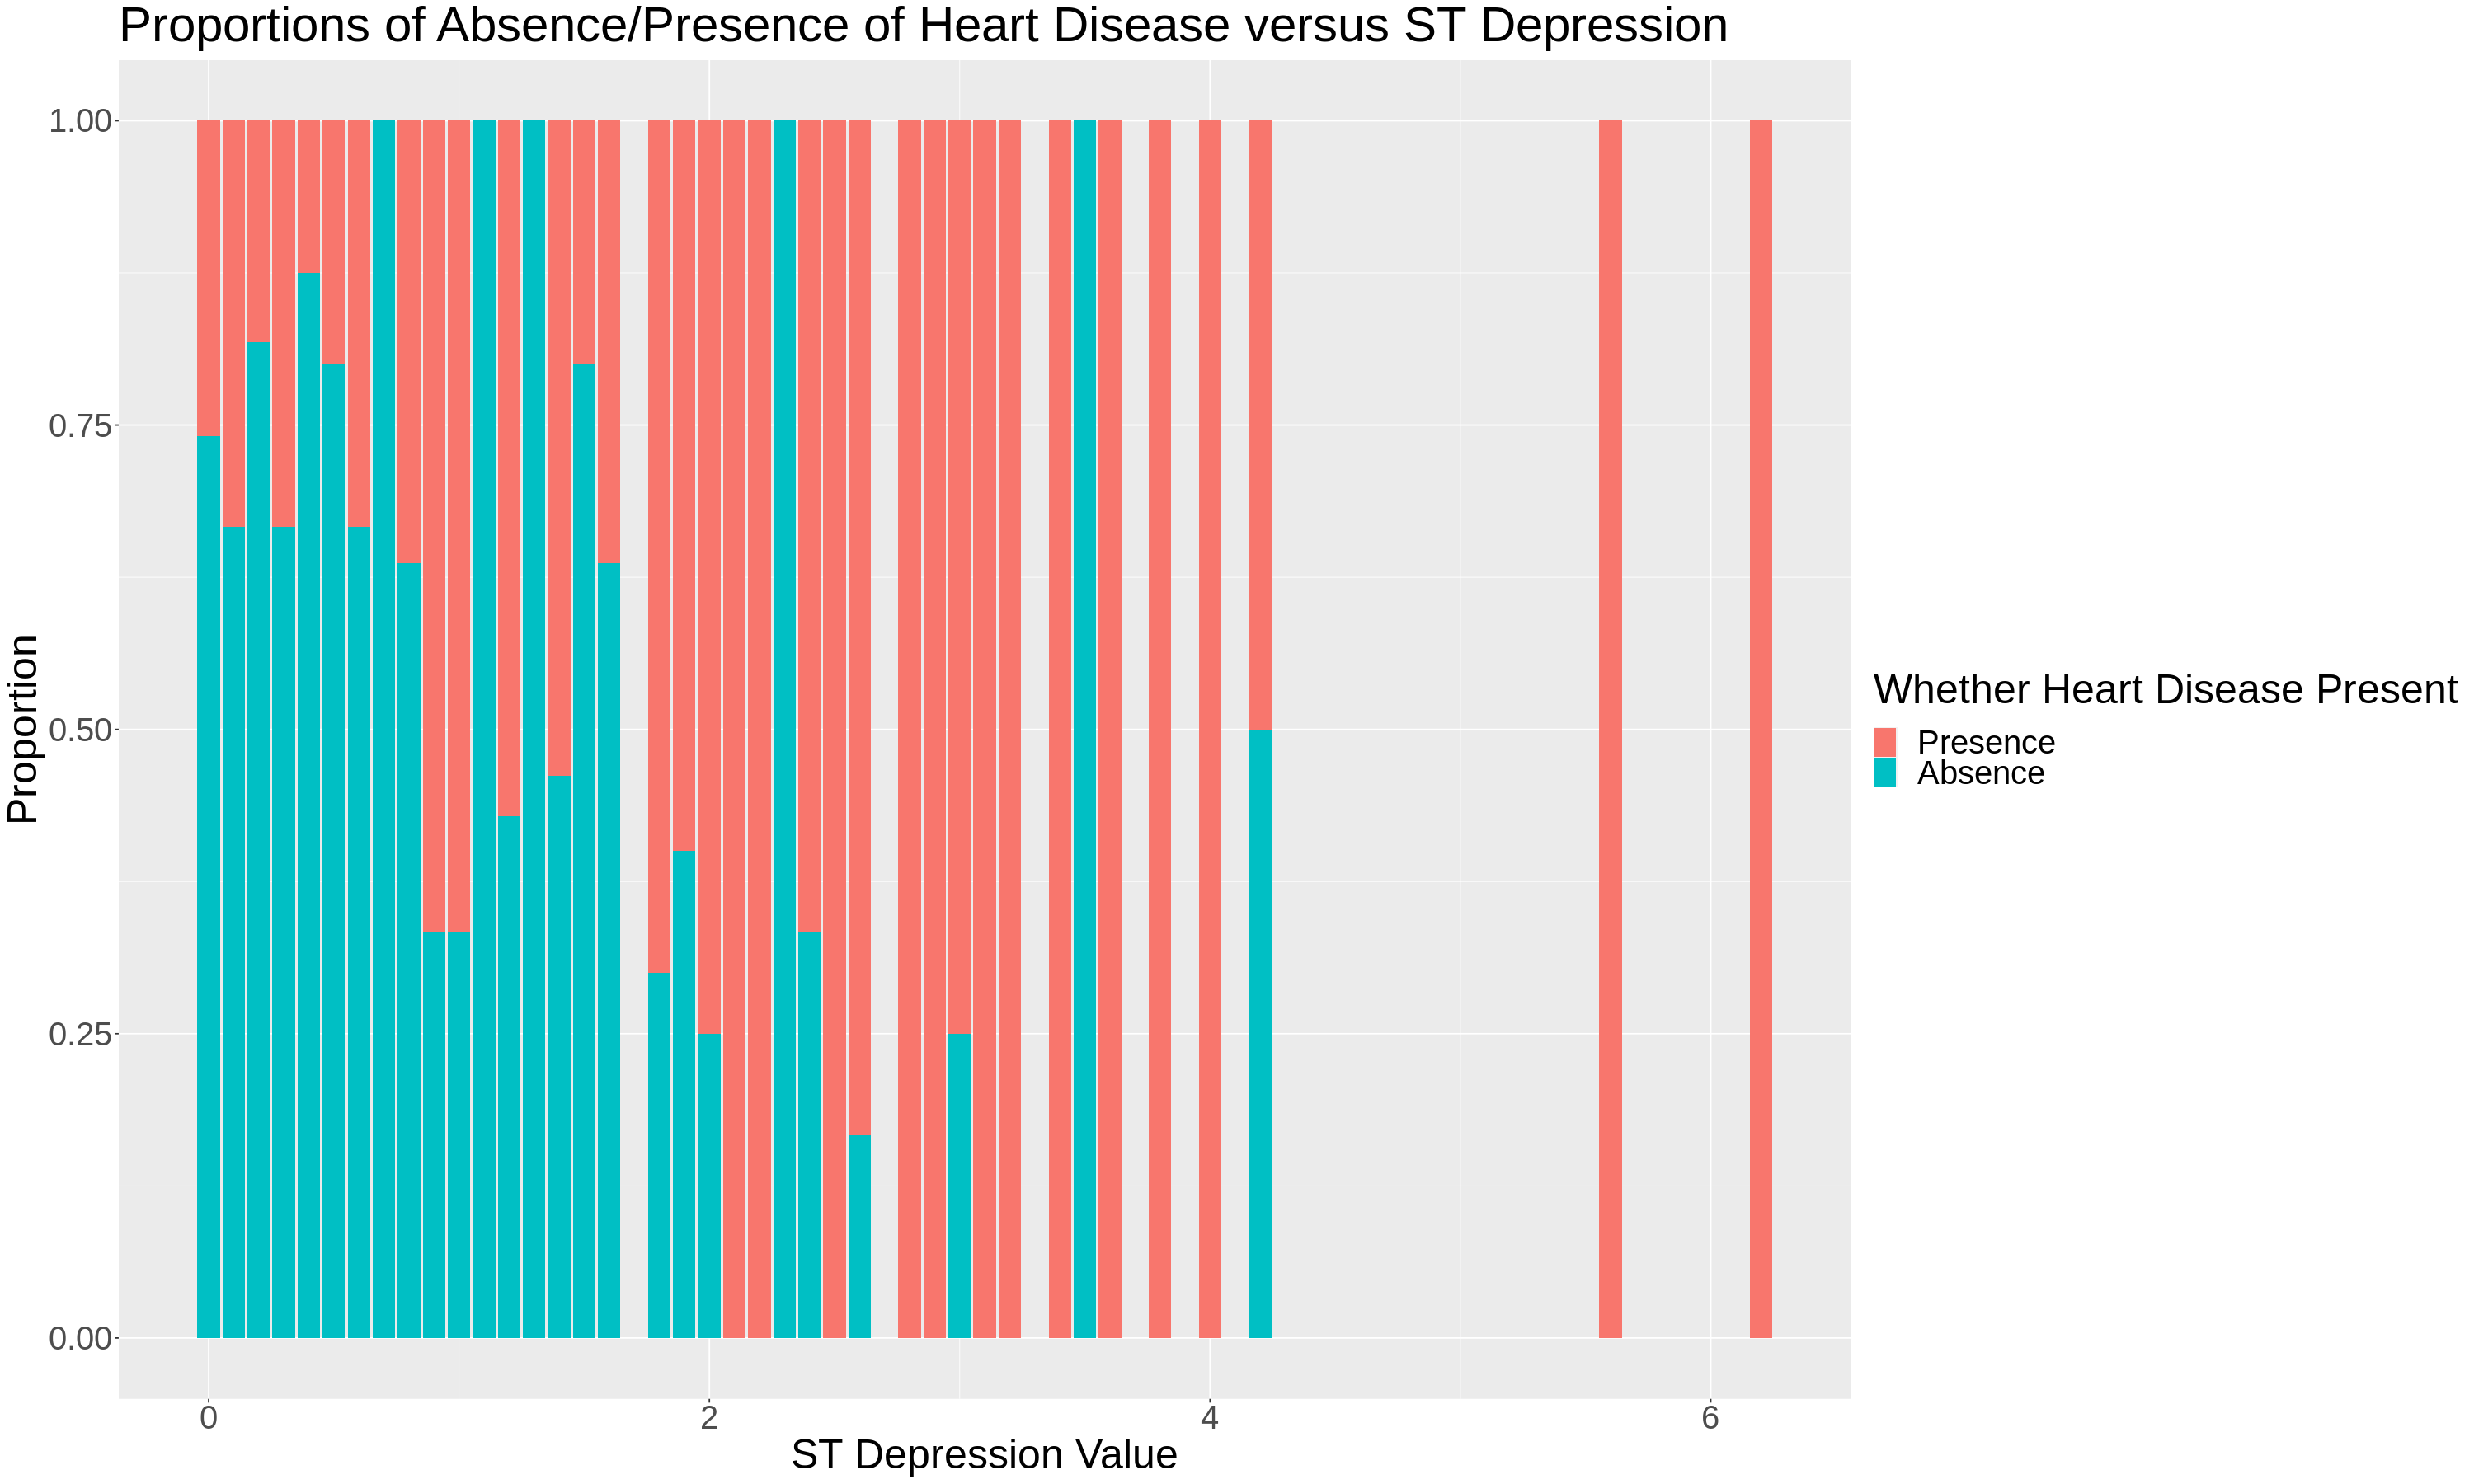

In [52]:
# visualize as a bar plot of the presence/absence proportions in different age groups 
st_graph <- ggplot(data = heart_data, aes(x = `ST depression`, fill = `Heart Disease`)) + 
            geom_bar(position = "fill")+
            labs(x="ST Depression Value",y="Proportion",fill="Whether Heart Disease Present")+
             ggtitle("Proportions of Absence/Presence of Heart Disease versus ST Depression")+
            theme(text=element_text(size=30))
st_graph


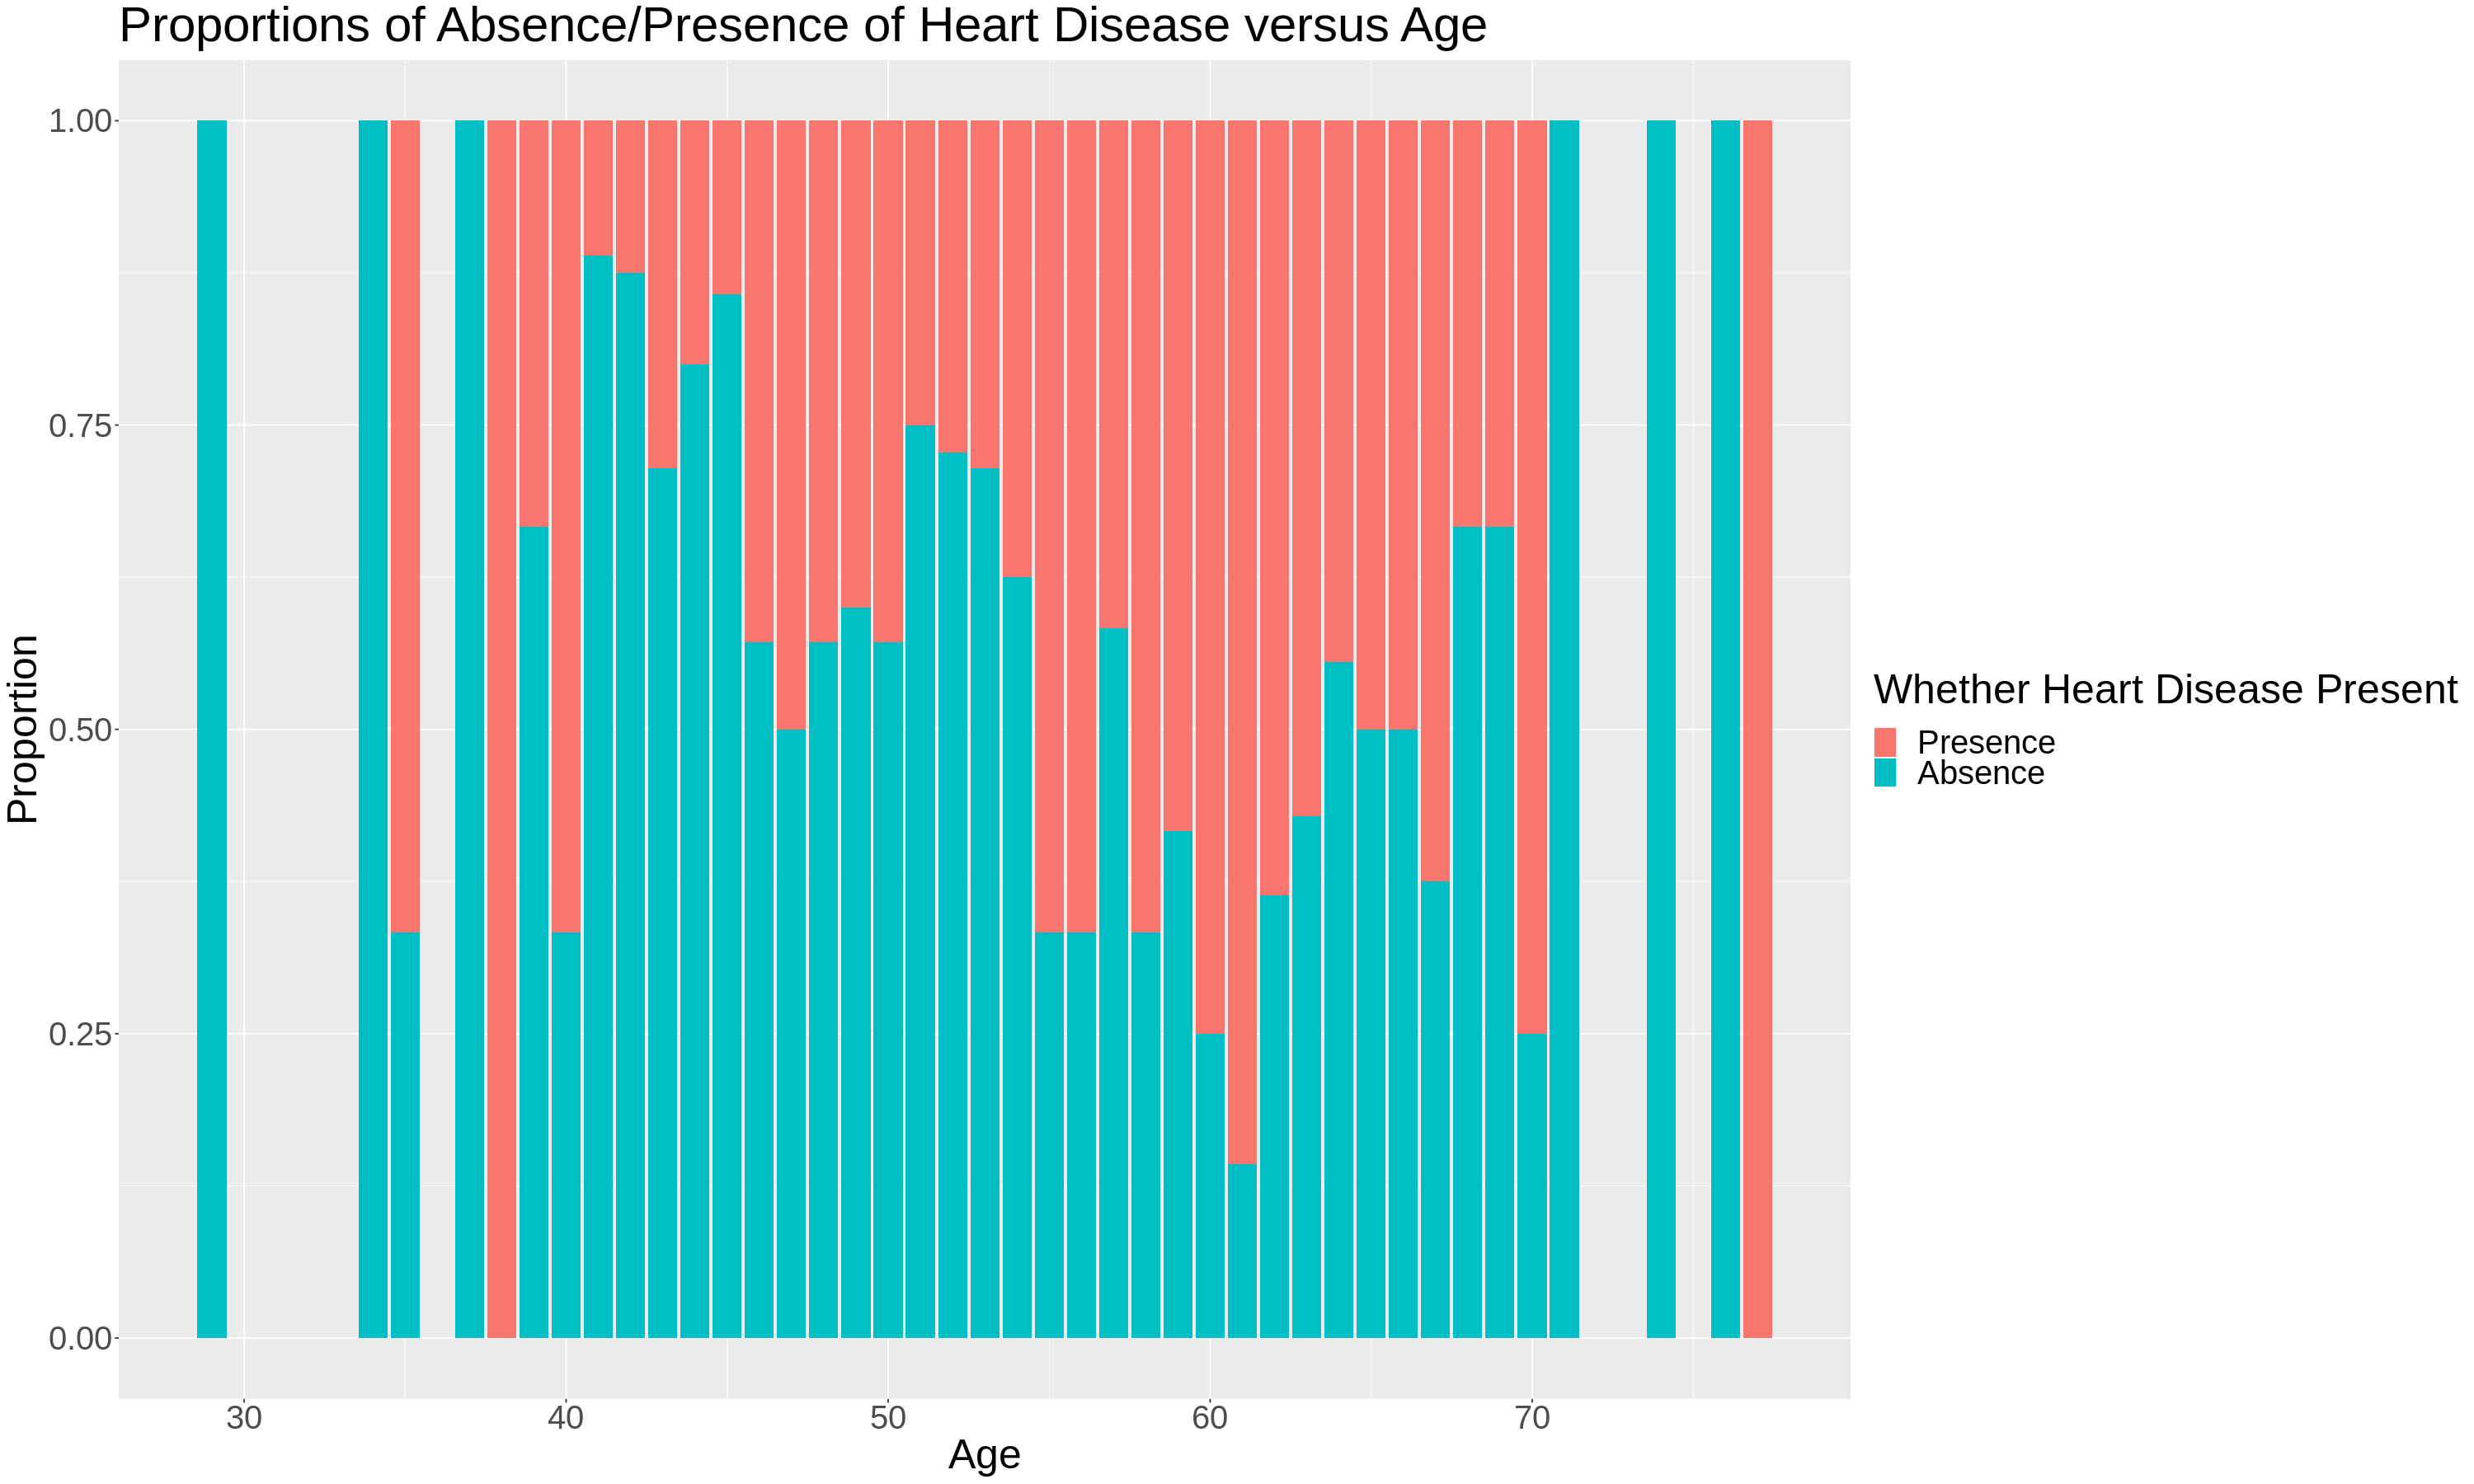

In [53]:
# visualize as a bar plot of the presence/absence proportions in different ST depression value
age_graph <- ggplot(data = heart_data, aes(x = `Age`, fill = `Heart Disease`)) + 
             geom_bar(position = "fill")+
             labs(x="Age",y="Proportion",fill="Whether Heart Disease Present")+
             ggtitle("Proportions of Absence/Presence of Heart Disease versus Age")+
             theme(text=element_text(size=30))
age_graph

In the first bar plot above, a positive relationship can be interpreted between ST depression and whether heart disease is present, as the depression value increases, the proportions of presences of heart disease become larger generally, except for two long blue bars between 2 and 4. It can be concluded that whether heart disease present is positively correlated to the ST Depression value no matter of different number of observations collected at each depression value. 

In the second bar plot above, the proportions of presence increases as age increases in the range of 30 to 60 approximately, and slowly decreases as the age increases in the range of 60 to 80. Overall, the age range between 45 to 70 has the largest proportion of presence of heart disease. This founding also infers that there is certain association between age and whether heart disease is present.

### Step 6: performs the data analysis with chosen variables

Since two variables age and depression are chosen for the coming data analysis, which are two numerical variables, and the predicting variable heart disease is categorical variable, K-nearest neighbors classification will be processed in the prediction.

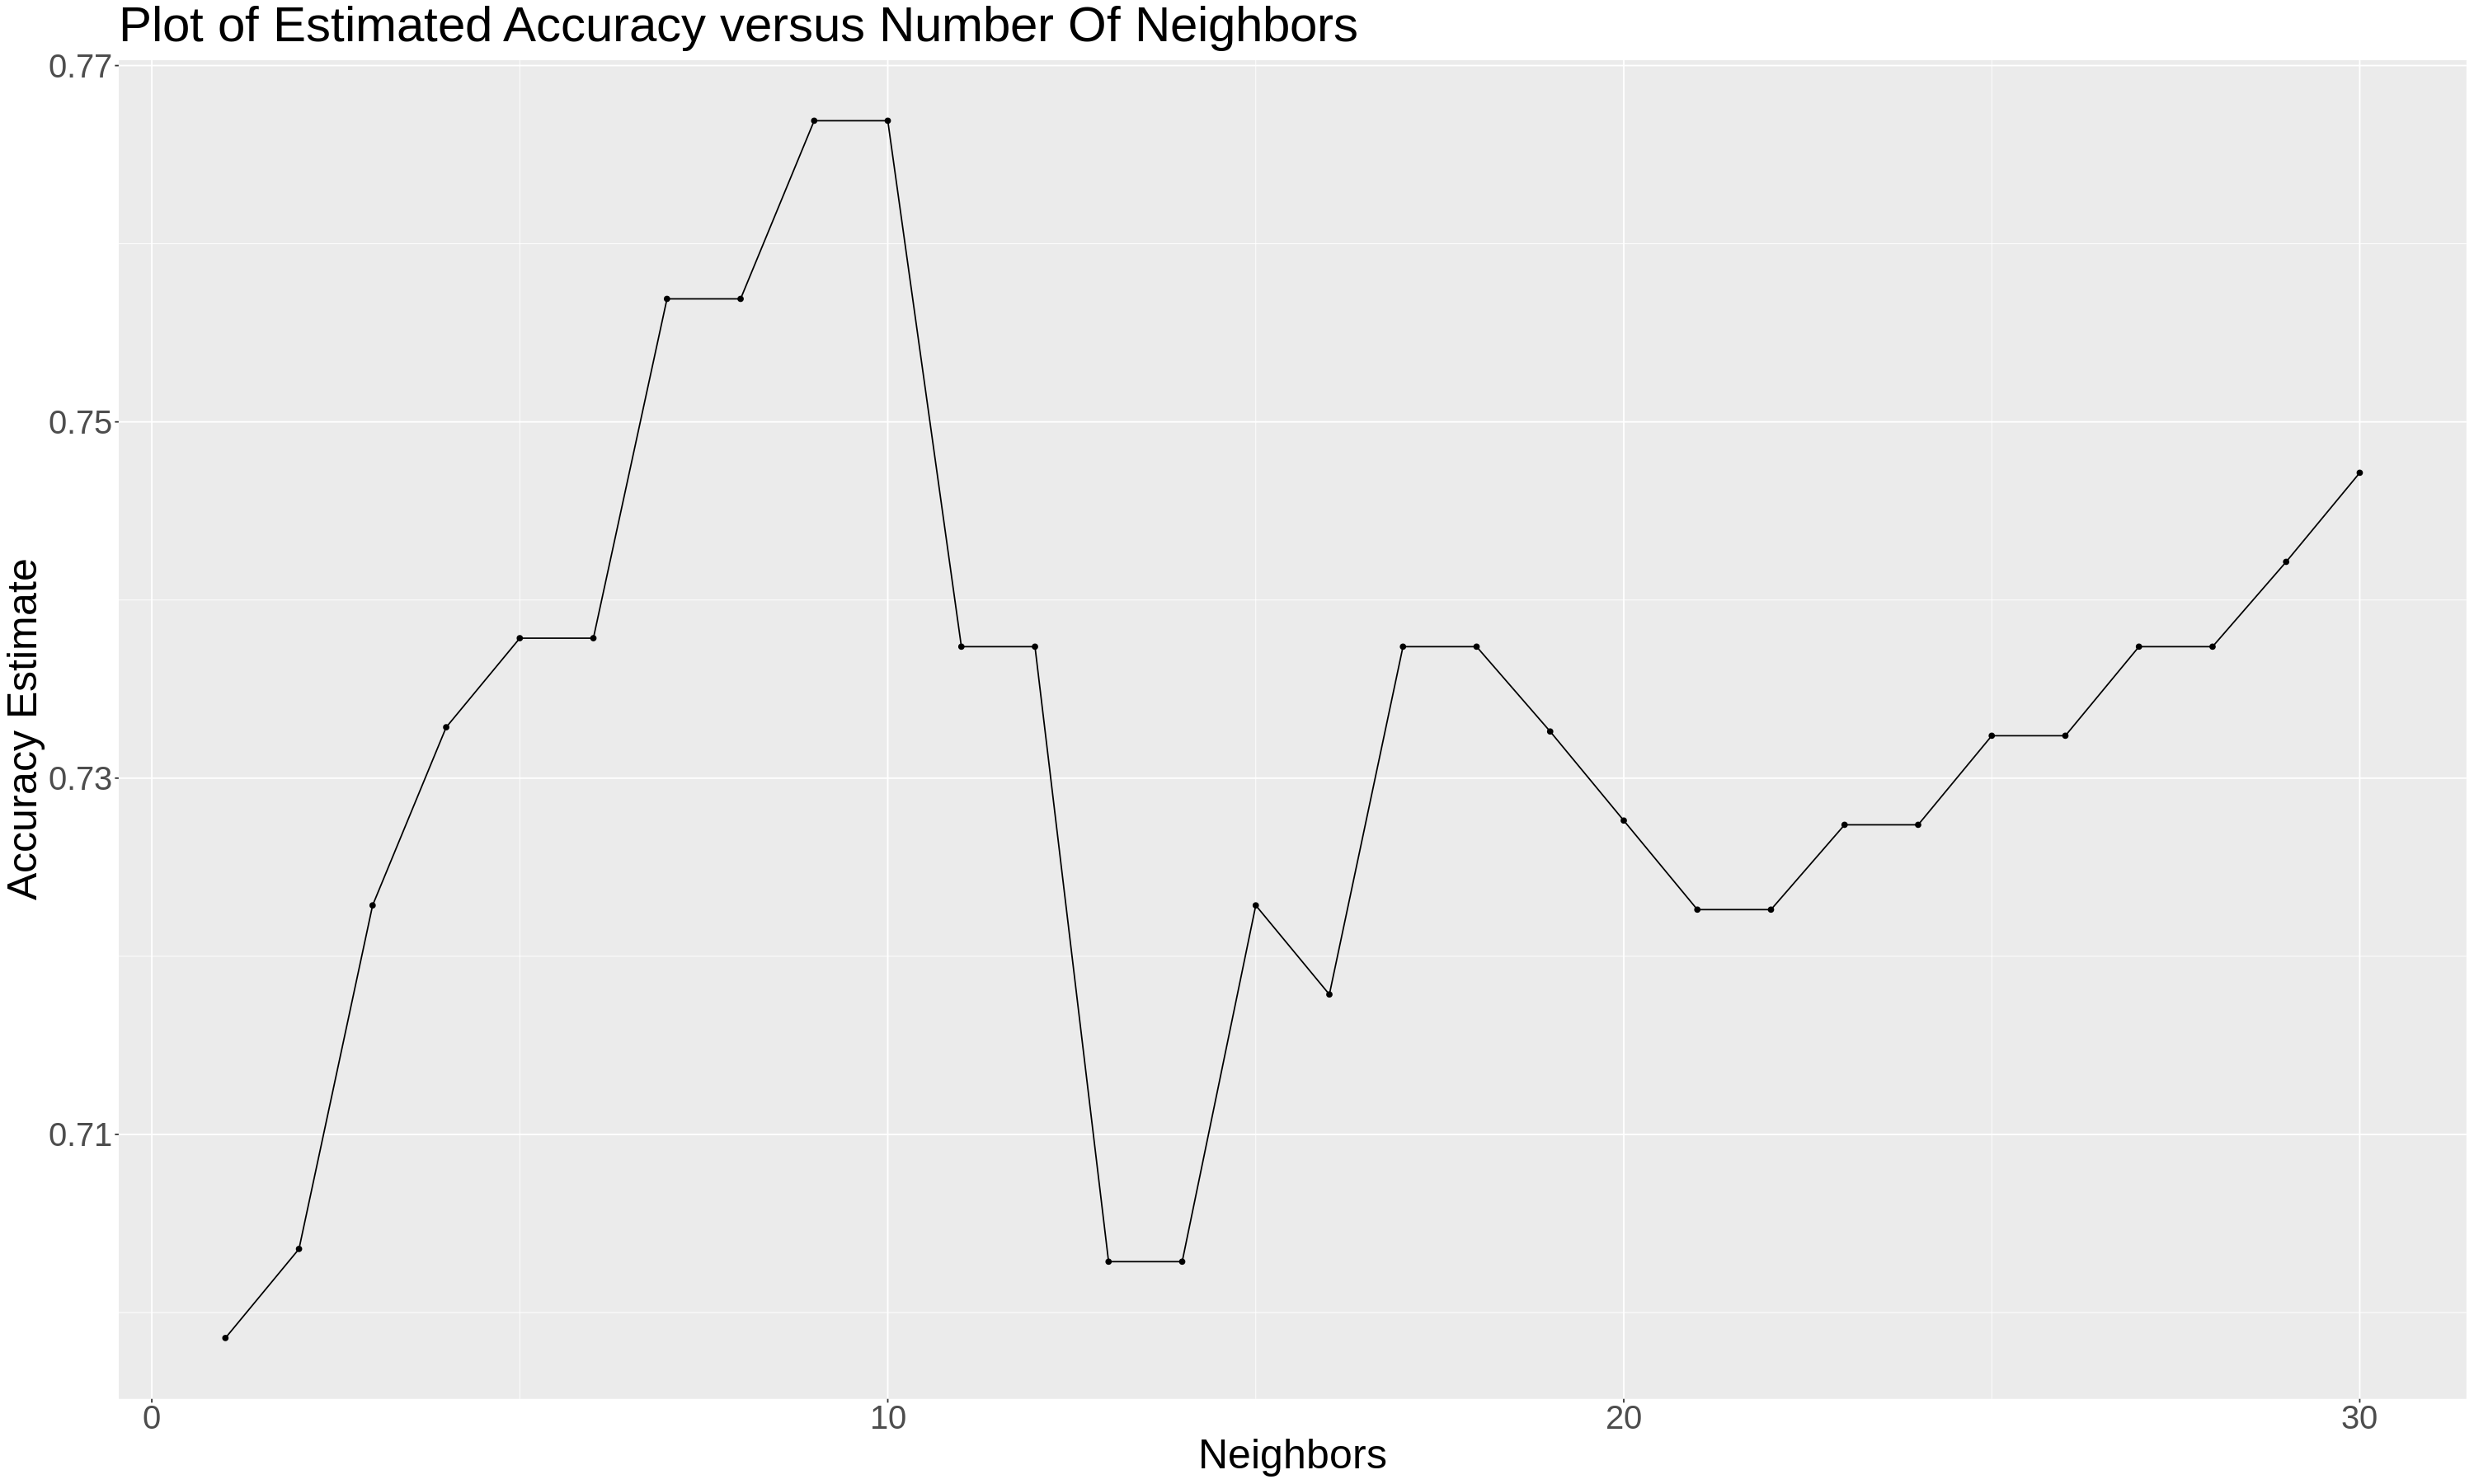

In [57]:
#TUNING CLASSIFIER

# set a seed for tuning process in order to produce reproducible results in cross-validation
set.seed(2021)

# create the standardization recipe based on traing data
heart_recipe <- recipe(`Heart Disease` ~ Age + `ST depression`, data = heart_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# fit the knn model, call nerest_neighbor function as doing K-nearest neighbors classification
# let weight_func = "rectangular" as predicting by straight line distance between points and 
# each K neighbors gets exactly 1 vote, set engine to "kknn" that is package used for training the model
# call set_mode to specify this is classification problem
knn_spec_tuning <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# since the more folds used give better accuracy, but larger number of folds takes more time, 
# here decide to do a 10-fold cross-validation, stratified by the categorical heart disease variable 
heart_vfold <- vfold_cv(heart_train, v = 10, strata = `Heart Disease`)

# select sequence of k values to try with the model
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# get the accuracies results by using each k value in the classification
knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec_tuning) |>
  tune_grid(resamples = heart_vfold, grid = k_vals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

# plot the accuracy versus K to decide which number of neighbors to use
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 30))+
  ggtitle("Plot of Estimated Accuracy versus Number Of Neighbors")

accuracy_vs_k

In [59]:
# rank the accuracies given by different k values to see the k values with top highest accurracies
maxaccuracies <-knn_results|>arrange(desc(mean))
maxaccuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.7669048,10,0.02722916,Preprocessor1_Model09
10,accuracy,binary,0.7669048,10,0.02722916,Preprocessor1_Model10
7,accuracy,binary,0.7569048,10,0.02213831,Preprocessor1_Model07
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,accuracy,binary,0.7028571,10,0.02684558,Preprocessor1_Model13
14,accuracy,binary,0.7028571,10,0.02684558,Preprocessor1_Model14
1,accuracy,binary,0.6985714,10,0.03293832,Preprocessor1_Model01


**CHOOSING K VALUE**

From the K selection processes above, K=9 or 10 provides the highest accuracy 0.7669, however, the estimated accuracy changes by only small amount if increasing or decreasing k only when k=9 (k=11 decreases a lot from k=10, thus 10 is not a good number). Also, k=9 does not create a prohibitively expensive computational cost of traning. Considering these three resons, we indeed select k=9 for the classifier after the tuning process.

In [60]:
# Predicting heart disease with tuned classifier in testing data set

# create the model specification with the chosen k value 9
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
  set_engine("kknn") |>
  set_mode("classification")

# chain recipe, model together using workflow and use fit to pass steps on the unscaled training heart disease data, 
knn_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  fit(data = heart_train)

# make the prediction on test dataset by calling predict function using teh fit object created
# a dataframe output adding prediction results of whether heart disease present to the test data set
heart_test_predictions <- predict(knn_fit, heart_test) |>
  bind_cols(heart_test)

# calculate the accuracy of the built classifier working on the test dataset, where the correct predictions has same 
# predicted value (.estimate column) as the original true value (`Heart Disease`) in test dataset.
heart_test_predictions |>
  metrics(truth = `Heart Disease`, estimate = .pred_class) |>
  filter(.metric == "accuracy")

# make the confusion matrix for the classifier, showing table of predicted labels and correct labels
confusion <- heart_test_predictions |>
  conf_mat(truth = `Heart Disease`, estimate = .pred_class)
confusion


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5735294


          Truth
Prediction Presence Absence
  Presence       15      14
  Absence        15      24

So far, a classification model is built on the overall heart disease dataset predicting whether heart disease present based on age and ST depression variables, and the accuracy of this classfier is approximately 0.5735. To evaluate this accuracy, the baseline can be used is the majority classifier, which is always similar to the majority heart disease type in the training data, which is calculated above as the proportion of presence of heart disease 0.5545. The accuracy of KNN classifier is slightly better than the majority classifier number, meaning that the KNN classifier improved a bit on the basic majority classifier after the whole process. 

However, talking about the application of the classifier, which is to predice whether a patient has heart disease, it is very important not to misdiagnose to avoid missing patients who actually has heart disease and need medical care. The confusio matrix above shows that the classifier misdiagnose 15 patients do not have heart disease when they actually have, and the number of accuracy in this classifier 0.5735 sounds terrible for application, meaning that just above half of the patients using this classifier can get the correct diagnose about their heart conditions.

Then what else can we do to improve the application of the classifier for predicting heart disease?

Based on the acadamic research done on heart disease mentioned in the introduction, we decide to investigate whether gender variation can improve the accuracy of classifier predicting whether heart disease present based on age and depression variables.

In [61]:
# set a seed for the splitting process below to produce reproducible results
set.seed(2022)

# pick out observations into two subsets for male and female from the original heart disease dataset
heart_data_male <- filter(heart_data,Sex==1)
heart_data_female <- filter(heart_data,Sex==0)

# For each of male and female, split the data 25/75 into a training set and test set, 
# the training set is for building classifier, and the test set is for evaluating the accuracy of the classifier for prediction,
# stratified in the predicting categorical variable, Heart Disease, 
# thus same proportion of absence or presence ends up in both training set and testing sets.
heart_split_male <- initial_split(heart_data_male, prop = 3/4, strata = `Heart Disease`)  
heart_train_male <- training(heart_split_male)   
heart_test_male <- testing(heart_split_male)

heart_split_female <- initial_split(heart_data_female, prop = 3/4, strata = `Heart Disease`)  
heart_train_female <- training(heart_split_female)   
heart_test_female <- testing(heart_split_female)

# For each of male and female, find the number and percentage of observations of 
# whether heart disease is present in the training dataset
male_hd_proportions <- group_by(heart_train_male,`Heart Disease`)|>
                       summarize(n=n())|>
                       mutate(percent = 100*n/nrow(heart_train_male))
male_hd_proportions

female_hd_proportions <- group_by(heart_train_female,`Heart Disease`)|>
                       summarize(n=n())|>
                       mutate(percent = 100*n/nrow(heart_train_female))
female_hd_proportions

Heart Disease,n,percent
<fct>,<int>,<dbl>
Presence,75,54.74453
Absence,62,45.25547


Heart Disease,n,percent
<fct>,<int>,<dbl>
Presence,15,23.07692
Absence,50,76.92308


**Cells below are the same process for tuning model, building classifier, evaluating classifier accuracy for male observations**

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
15,accuracy,binary,0.6626007,10,0.03003114,Preprocessor1_Model15
16,accuracy,binary,0.6626007,10,0.03003114,Preprocessor1_Model16
19,accuracy,binary,0.6626007,10,0.02370092,Preprocessor1_Model19
⋮,⋮,⋮,⋮,⋮,⋮,⋮
29,accuracy,binary,0.6020879,10,0.04036110,Preprocessor1_Model29
1,accuracy,binary,0.5797436,10,0.05335351,Preprocessor1_Model01
2,accuracy,binary,0.5797436,10,0.05335351,Preprocessor1_Model02


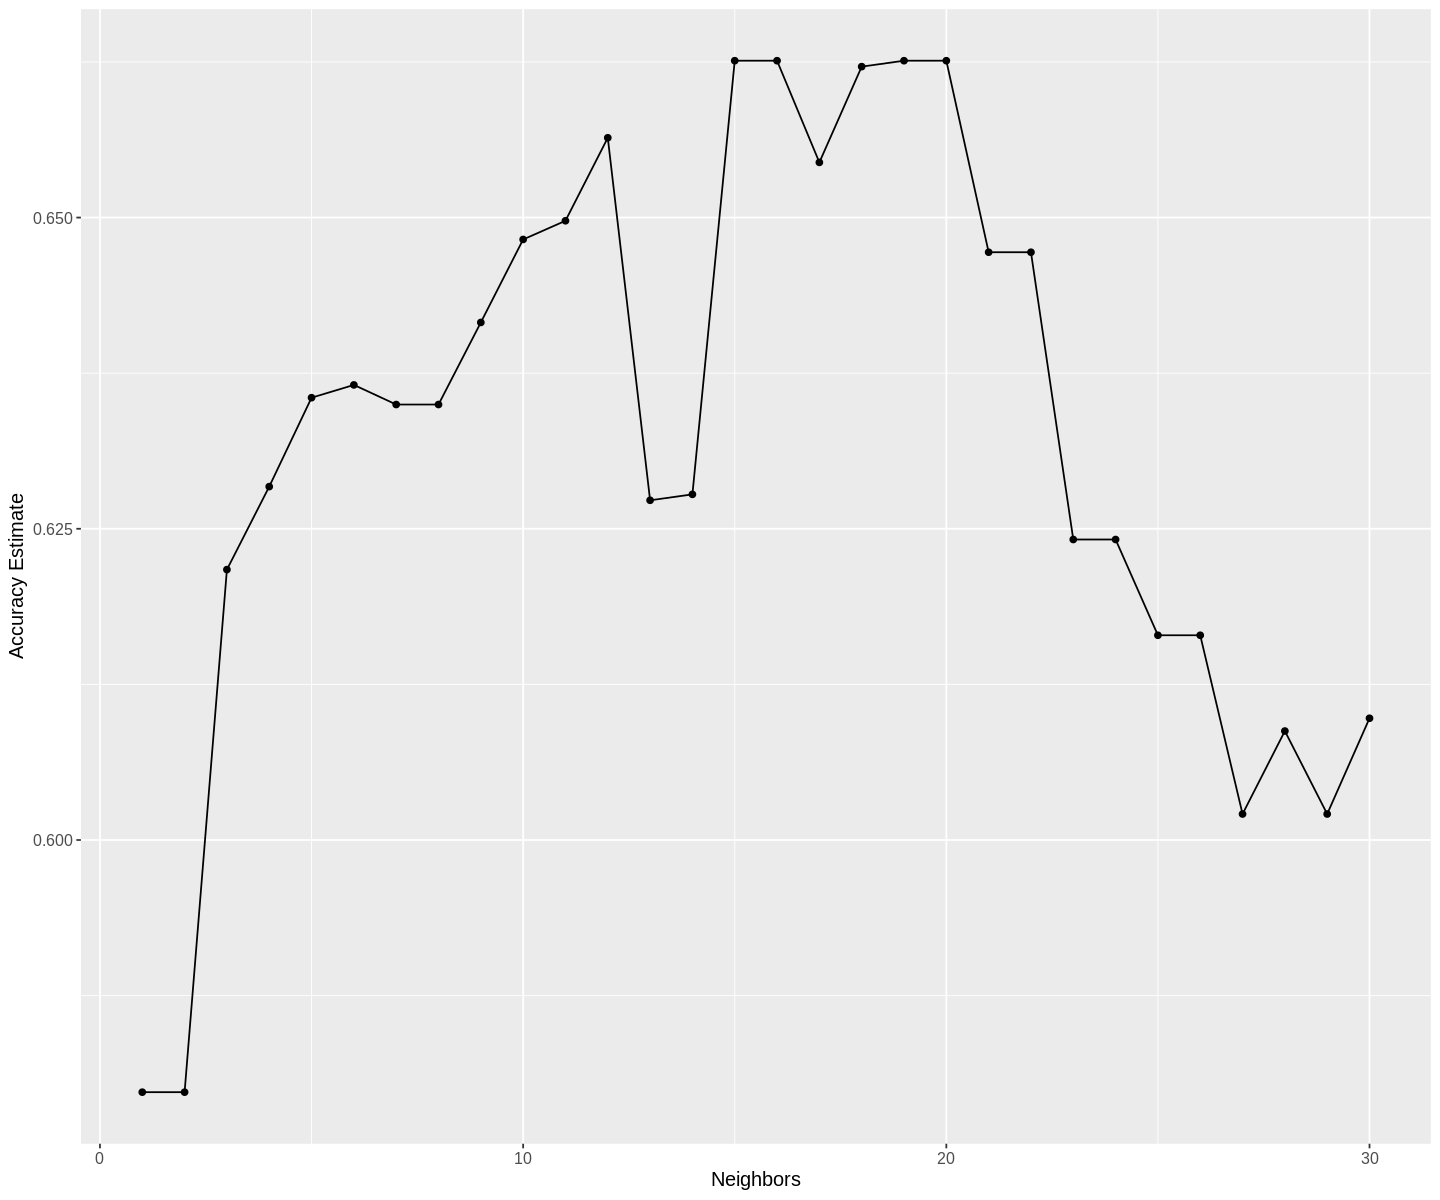

In [14]:

set.seed(2021)
heart_recipe_male <- recipe(`Heart Disease` ~ Age + `ST depression`, data = heart_train_male) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec_tuning_male <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_vfold_male <- vfold_cv(heart_train_male, v = 10, strata = `Heart Disease`)

knn_results_male <- workflow() |>
  add_recipe(heart_recipe_male) |>
  add_model(knn_spec_tuning_male) |>
  tune_grid(resamples = heart_vfold_male, grid = k_vals) |>
  collect_metrics() 

accuracies_male <- knn_results_male |>
  filter(.metric == "accuracy")

accuracy_vs_k_male <- ggplot(accuracies_male, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k_male

maxaccuracies_male <-accuracies_male|>arrange(desc(mean))
maxaccuracies_male



In [63]:
# CHOOSING K:
# From the K selection processes above, K=15, 16 or 19 provides the highest accuracy 0.6626, 
# however, the estimated accuracy changes by large amount if increasing or decreasing k when k = 15 or 16,
# it seens like k=19 is a better choice based on the accuracy estimation.
# However, after trying several K values on classifier, higher accuracy 0.6739 is granted by using k=10 
# than the accuracy 0.5870 using k=19 shown below 
# Also, k=10 has less prohibitively expensive computational cost of traning than k=19
# Considering these three resons, we select k=10 for the final classifier after the tuning process and will discuss the best 
# accuracy 0.6739 granted by setting k=10 in the rest of the report.

#try for k=19
knn_spec_male_19 <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit_male_19 <- workflow() |>
  add_recipe(heart_recipe_male) |>
  add_model(knn_spec_male_19) |>
  fit(data = heart_train_male)

heart_test_predictions_male_19 <- predict(knn_fit_male_19, heart_test_male) |>
  bind_cols(heart_test_male)

heart_test_predictions_male_19 |>
  metrics(truth = `Heart Disease`, estimate = .pred_class) |>
  filter(.metric == "accuracy")

#try for k=10
knn_spec_male <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit_male <- workflow() |>
  add_recipe(heart_recipe_male) |>
  add_model(knn_spec_male) |>
  fit(data = heart_train_male)

heart_test_predictions_male <- predict(knn_fit_male, heart_test_male) |>
  bind_cols(heart_test_male)

heart_test_predictions_male |>
  metrics(truth = `Heart Disease`, estimate = .pred_class) |>
  filter(.metric == "accuracy")

confusion_male <- heart_test_predictions_male |>
  conf_mat(truth = `Heart Disease`, estimate = .pred_class)
confusion_male


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5869565


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.673913


          Truth
Prediction Presence Absence
  Presence       17       7
  Absence         8      14

**Cells below are the same process for tuning model, building classifier, evaluating classifier accuracy for female observations**

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.8404762,10,0.04124694,Preprocessor1_Model07
8,accuracy,binary,0.8404762,10,0.04124694,Preprocessor1_Model08
5,accuracy,binary,0.8285714,10,0.03527954,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,accuracy,binary,0.7261905,10,0.03675726,Preprocessor1_Model11
12,accuracy,binary,0.7261905,10,0.03675726,Preprocessor1_Model12
14,accuracy,binary,0.7261905,10,0.03675726,Preprocessor1_Model14


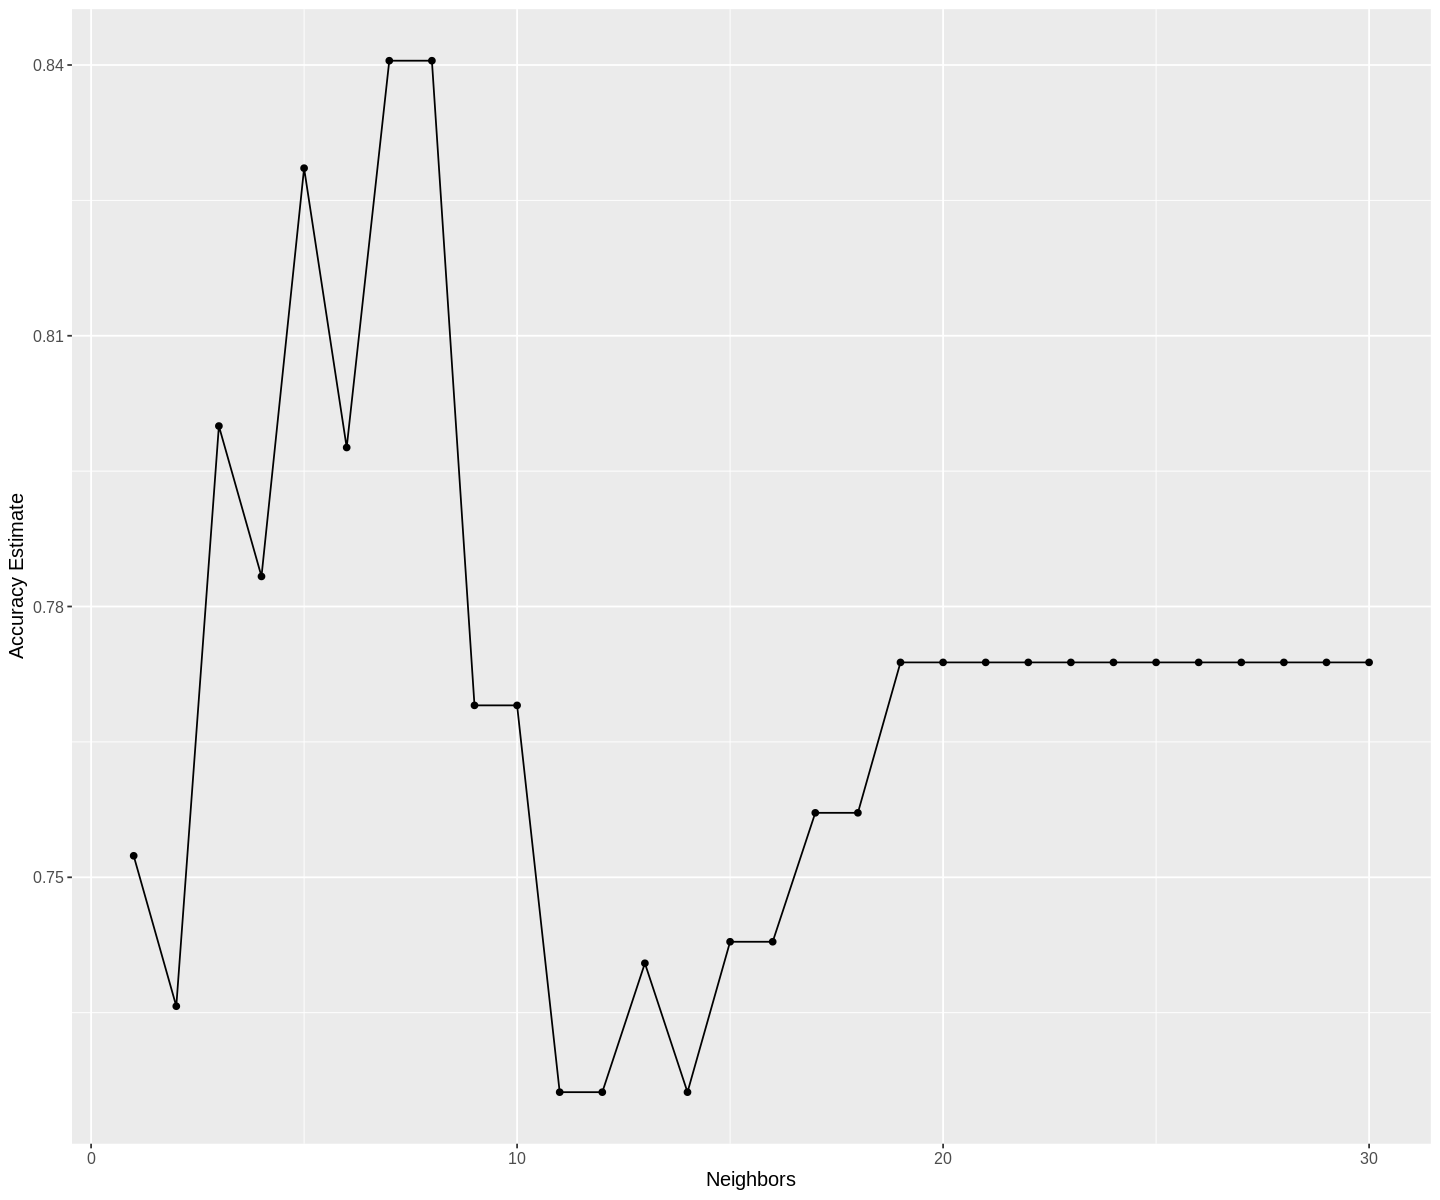

In [16]:
#working for female
set.seed(2021)
heart_recipe_female <- recipe(`Heart Disease` ~ Age + `ST depression`, data = heart_train_female) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec_tuning_female <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_vfold_female <- vfold_cv(heart_train_female, v = 10, strata = `Heart Disease`)

knn_results_female <- workflow() |>
  add_recipe(heart_recipe_female) |>
  add_model(knn_spec_tuning_female) |>
  tune_grid(resamples = heart_vfold_female, grid = k_vals) |>
  collect_metrics() 

accuracies_female <- knn_results_female |>
  filter(.metric == "accuracy")

accuracy_vs_k_female <- ggplot(accuracies_female, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k_female

maxaccuracies_female <-accuracies_female|>arrange(desc(mean))
maxaccuracies_female

In [68]:
# CHOOSING K VALUE
# From the K selection processes above, K=7 or 8 provides the highest accuracy 0.8405, however, 
# the estimated accuracy changes by less amount if increasing or decreasing k only when k=7 
# compared to when k=8, thus k=7 is a better choice at this point.
# Also, k=7 does not create a prohibitively expensive computational cost of traning. 
# Considering these three resons, we indeed select k=7 for the classifier after the tuning process.
knn_spec_female <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit_female <- workflow() |>
  add_recipe(heart_recipe_female) |>
  add_model(knn_spec_female) |>
  fit(data = heart_train_female)

heart_test_predictions_female <- predict(knn_fit_female, heart_test_female) |>
  bind_cols(heart_test_female)

heart_test_predictions_female |>
  metrics(truth = `Heart Disease`, estimate = .pred_class) |>
  filter(.metric == "accuracy")

confusion_female <- heart_test_predictions_female |>
  conf_mat(truth = `Heart Disease`, estimate = .pred_class)
confusion_female

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7727273


          Truth
Prediction Presence Absence
  Presence        3       3
  Absence         2      14

# Discussion

### findings

### whether results are expected

### Impact

### Furture Questions

# References

Heart Disease Resources | cdc.gov. (2022, July 12). Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/about.htm

DI FUSCO, S. A., PALAZZO, S., COLIVICCHI, F., & SANTINI, M. (2014). The Influence of Gender on Heart Rhythm Disease. Pacing and Clinical Electrophysiology, 37(5), 650–657. https://doi.org/10.1111/pace.12369

UCI Machine Learning Repository: Heart Disease Data Set. (n.d.). https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Shen, R., Zhao, N., Wang, J., Guo, P., Shen, S., Liu, D., & Zou, T. (2022). Association between level of depression and coronary heart disease, stroke risk and all-cause and cardiovascular mortality: Data from the 2005–2018 National Health and Nutrition Examination Survey. Frontiers in Cardiovascular Medicine, 9. https://doi.org/10.3389/fcvm.2022.954563

Kumari, S., Kumar, B., Singh, V. K., H N, J., & Shahnawaz, K. (2015). ASSOCIATION OF HYPERTENSION AND AGE WITH CORONARY HEART DISEASE: A CROSS - SECTIONAL STUDY FROM DARBHANGA DISTRICT OF BIHAR. Journal of Evolution of Medical and Dental Sciences, 4(60), 10453–10459. https://doi.org/10.14260/jemds/2015/1507
